<a href="https://colab.research.google.com/github/JacopoMangiavacchi/TF-PyTorch-LinearRegression/blob/main/LinearRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import PyTorch and TensorFlow

In [1]:
%tensorflow_version 2.x

In [2]:
import tensorflow as tf
print(f"tensorflow version: {tf.__version__}")

tensorflow version: 2.3.0


In [3]:
import torch
print(f"pytorch version: {torch.__version__}")

pytorch version: 1.6.0+cu101


# Generating the datasets

In [4]:
import numpy as np
import matplotlib.pyplot as plt

In [5]:
def generate_data(m=0.1, b=0.3, n=200):
    x = tf.random.uniform(shape=(n,),minval=-10,maxval=10) 
    noise = tf.random.normal(shape=(len(x),), stddev=0.15)
    y = (m * x + b ) + noise
    return x.numpy(), y.numpy()

## Data Visualization

Text(0, 0.5, 'y')

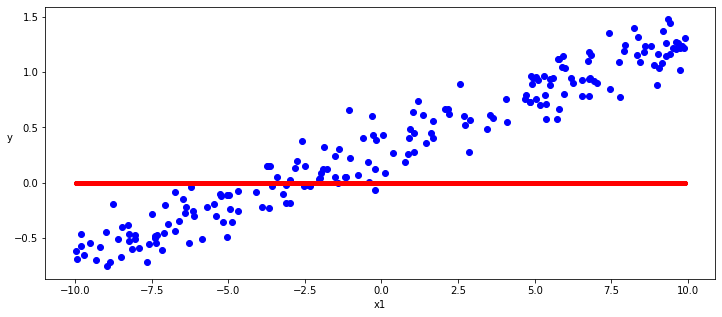

In [6]:
m = tf.Variable(0.)
b = tf.Variable(0.)
x, y = generate_data()
plt.figure(figsize = (12,5))
ax = plt.subplot(111)
ax.scatter(x,y, c = "b", label="samples")
ax.plot(x,m*x+b,"-r",linewidth = 5.0,label = "model")
plt.xlabel("x1")
plt.ylabel("y",rotation = 0)

# TensorFlow Model

In [7]:
class LinearRegressionKeras:
    def __init__(self):
        self.params = {
            "w" : tf.Variable(0.),
            "b" : tf.Variable(0.)
        }        

    def __call__(self,x): 
        y_pred = self.params["w"] * x + self.params["b"]
        return y_pred

# PyTorch Model

In [8]:
class LinearRegressionPyTorch(torch.nn.Module): 
    def __init__(self): 
        super(LinearRegressionPyTorch, self).__init__() 
        self.w = torch.nn.Parameter(torch.Tensor(1, 1))
        self.b = torch.nn.Parameter(torch.Tensor(1))
        self.w.data.uniform_(-0.1, 0.1)
        self.b.data.uniform_(-0.1, 0.1)
  
    def forward(self, x):  
        return x @ self.w + self.b
    
    
# class LinearRegressionPyTorch(torch.nn.Module):
#     def __init__(self):
#         super(LinearRegressionPyTorch, self).__init__()
#         self.linear = torch.nn.Linear(1, 1)  

#     def forward(self, x):
#         out = self.linear(x)
#         return out

# TensorFlow Training

In [9]:
epochs = 500
learning_rate = 0.001

In [10]:
def squared_error(y_pred, y_true):
    return tf.reduce_mean(tf.square(y_pred - y_true))

tf_model = LinearRegressionKeras()

for epoch in tf.range(1,epochs):
    with tf.GradientTape() as tape:
        predictions = tf_model(x)
        loss = squared_error(predictions, y)
        
    dloss_dw,dloss_db = tape.gradient(loss, [tf_model.params["w"], tf_model.params["b"]])

    tf_model.params["w"].assign(tf_model.params["w"] - learning_rate*dloss_dw)
    tf_model.params["b"].assign(tf_model.params["b"] - learning_rate*dloss_db)
    if epoch % 20 == 0:
        print(f"Step {epoch}, Loss {loss.numpy()}") # we print the loss only each 20 epochs

Step 20, Loss 0.13239425420761108
Step 40, Loss 0.10602762550115585
Step 60, Loss 0.09881237149238586
Step 80, Loss 0.09293285012245178
Step 100, Loss 0.0875401496887207
Step 120, Loss 0.08256281167268753
Step 140, Loss 0.07796741276979446
Step 160, Loss 0.07372458279132843
Step 180, Loss 0.06980728358030319
Step 200, Loss 0.06619051843881607
Step 220, Loss 0.06285123527050018
Step 240, Loss 0.05976814776659012
Step 260, Loss 0.05692160502076149
Step 280, Loss 0.05429346114397049
Step 300, Loss 0.05186694487929344
Step 320, Loss 0.04962660372257233
Step 340, Loss 0.04755813628435135
Step 360, Loss 0.04564836621284485
Step 380, Loss 0.04388512670993805
Step 400, Loss 0.04225717484951019
Step 420, Loss 0.040754109621047974
Step 440, Loss 0.039366353303194046
Step 460, Loss 0.038085076957941055
Step 480, Loss 0.03690209612250328


# PyTorch Training

In [11]:
inputs = torch.autograd.Variable(torch.from_numpy(x.reshape(-1, 1)))
labels = torch.autograd.Variable(torch.from_numpy(y.reshape(-1, 1)))


In [12]:
def squared_error(y_pred, y_true):
    diff = y_pred - y_true
    return torch.sum(diff * diff) / diff.numel()


torch_model = LinearRegressionPyTorch()

# criterion = torch.nn.MSELoss(reduction='mean')
optimizer = torch.optim.SGD(torch_model.parameters(), lr=learning_rate)

for epoch in range(epochs):
    epoch_loss = 0
    y_pred = torch_model(inputs)

    loss = squared_error(y_pred, labels)

    epoch_loss = loss.data

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    if epoch % 20 == 0:
      print("Epoch {} : Loss {}".format(epoch, epoch_loss))


Epoch 0 : Loss 0.3783263862133026
Epoch 20 : Loss 0.16342933475971222
Epoch 40 : Loss 0.14406242966651917
Epoch 60 : Loss 0.13435745239257812
Epoch 80 : Loss 0.1257704347372055
Epoch 100 : Loss 0.11785925179719925
Epoch 120 : Loss 0.11055584251880646
Epoch 140 : Loss 0.10381275415420532
Epoch 160 : Loss 0.09758703410625458
Epoch 180 : Loss 0.09183896332979202
Epoch 200 : Loss 0.08653188496828079
Epoch 220 : Loss 0.08163198828697205
Epoch 240 : Loss 0.0771080031991005
Epoch 260 : Loss 0.07293111085891724
Epoch 280 : Loss 0.06907467544078827
Epoch 300 : Loss 0.06551413238048553
Epoch 320 : Loss 0.06222672760486603
Epoch 340 : Loss 0.059191565960645676
Epoch 360 : Loss 0.05638926103711128
Epoch 380 : Loss 0.05380195751786232
Epoch 400 : Loss 0.0514131560921669
Epoch 420 : Loss 0.04920763522386551
Epoch 440 : Loss 0.04717131704092026
Epoch 460 : Loss 0.045291222631931305
Epoch 480 : Loss 0.04355538263916969


# Data Visualization

In [13]:
[w, b] = torch_model.parameters()

tf_model.params["w"].numpy(), tf_model.params["b"].numpy(), w.tolist()[0][0], b.tolist()[0]

(0.0998257, 0.19695164, 0.1000535786151886, 0.17268410325050354)

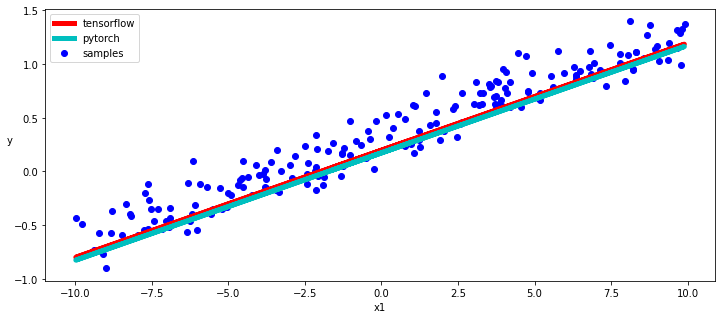

In [14]:
with torch.no_grad():
  x_train, y_train = generate_data()
  plt.figure(figsize = (12,5))
  ax = plt.subplot(111)
  ax.scatter(x_train,y_train, c = "b", label="samples")
  ax.plot(x, tf_model.params["w"] * x + tf_model.params["b"], "r", linewidth = 5.0, label = "tensorflow")
  ax.plot(x, w * inputs + b, "c", linewidth = 5.0, label = "pytorch")
  ax.legend()
  plt.xlabel("x1")
  plt.ylabel("y",rotation = 0)